### Grupo 4
### Miguel Egido Morales, Ana Robledano Abasolo, Alfredo Robledano Abasolo
# P3 AA Redes de Neuronas Convolucionales

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
ds, ds_info = tfds.load('cifar100',
               shuffle_files=True,
               with_info=True)
# Obtenemos los posibles valores de las etiquetas con ds_info
classes = ds_info.features['label'].names
superclasses = ds_info.features['coarse_label'].names

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/3.0.2.incomplete56AQ1D/cifar100-train.tfrecord*...:   0%|        …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/3.0.2.incomplete56AQ1D/cifar100-test.tfrecord*...:   0%|         …

Dataset cifar100 downloaded and prepared to /root/tensorflow_datasets/cifar100/3.0.2. Subsequent calls will reuse this data.


In [17]:
# Se elimina el campo id al no interesarnos
ds_train = ds['train'].map(lambda x: {'image': x['image'],
                                      'label': x['label'],
                                      'coarse_label': x['coarse_label']})
# Tomamos un 20% de las imágenes de entrenamiento para validación
validation_size = int(0.2 * ds_info.splits['train'].num_examples)

ds_validation = ds_train.take(validation_size)
ds_train = ds_train.skip(validation_size)

In [5]:
len(ds_train), len(ds_validation)

(40000, 10000)

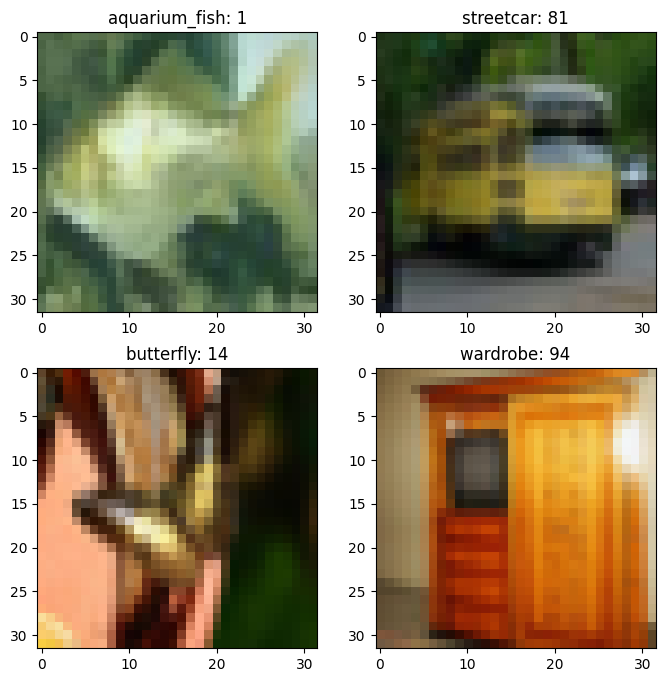

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
# Mostramos 4 imágenes del dataset de entrenamiento
for i, x in enumerate(ds_train.take(4)):
  image, label, coarse_label = x.values()
  plt.subplot(2, 2, i+1)
  plt.imshow(image)
  plt.title(f"{classes[label]}: {label}")

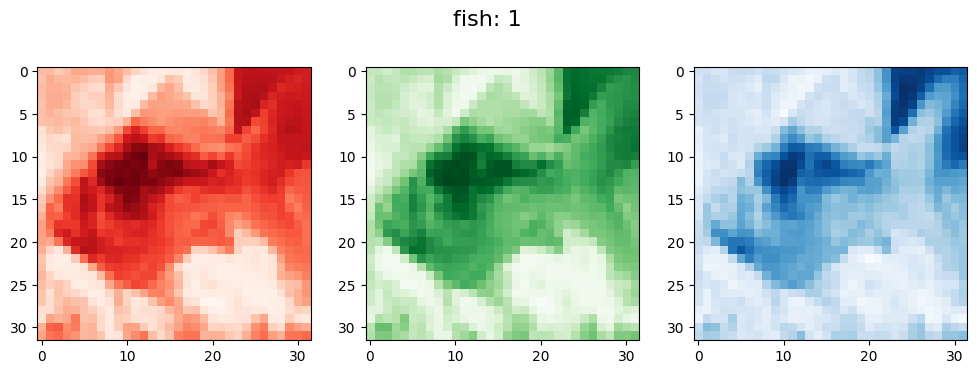

In [8]:
fig = plt.figure(figsize=(12, 4))
# Mostramos los canales en los que se divide una imagen
for x in ds_train.take(1):
  image, label, coarse_label = x.values()
  for i, channel in enumerate(['Reds', 'Greens', 'Blues']):  # RGB
    plt.subplot(1, 3, i+1)
    plt.imshow(image[:, :, i], cmap=channel)
  plt.suptitle(f"{superclasses[coarse_label]}: {coarse_label}", size=16)

In [19]:
def normalize_image(tensor_dict):
  tensor_dict['image'] = tf.cast(tensor_dict['image'], tf.float32)/255.0
  return tensor_dict
ds_train = ds_train.map(normalize_image)

In [20]:
ds_train

<_MapDataset element_spec={'image': TensorSpec(shape=(32, 32, 3), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'coarse_label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [21]:
for elem in ds_train.take(1):
  print(elem)

{'image': <tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[0.3137255 , 0.4117647 , 0.28627452],
        [0.3137255 , 0.4117647 , 0.28627452],
        [0.27450982, 0.37254903, 0.24705882],
        ...,
        [0.7176471 , 0.8156863 , 0.77254903],
        [0.6901961 , 0.7921569 , 0.7294118 ],
        [0.68235296, 0.7921569 , 0.7490196 ]],

       [[0.2901961 , 0.3882353 , 0.2627451 ],
        [0.34901962, 0.44705883, 0.32156864],
        [0.32156864, 0.41960785, 0.29411766],
        ...,
        [0.68235296, 0.7607843 , 0.6509804 ],
        [0.6627451 , 0.7490196 , 0.64705884],
        [0.6862745 , 0.78039217, 0.72156864]],

       [[0.30980393, 0.40784314, 0.28235295],
        [0.34117648, 0.4392157 , 0.3137255 ],
        [0.34117648, 0.4392157 , 0.3137255 ],
        ...,
        [0.6745098 , 0.7372549 , 0.5647059 ],
        [0.68235296, 0.7529412 , 0.6156863 ],
        [0.69411767, 0.77254903, 0.69803923]],

       ...,

       [[0.20392157, 0.3019608 , 0.18039216],
     